# Covid CNN

Disciplina: COC891 

Autores: Eric, Paula 

Data: 03/12/2020 - Load dataset, CNN "basico"

In [1]:
# Import
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, argparse, pathlib
from eval import eval
from data import BalanceCovidDataset

In [5]:
# Definicao de Parametros
trainfile = 'train_split.txt'
testfile = 'test_split.txt'
datadir = '..\\data\\'
covid_percent= 0.3
input_size = 480
top_percent = 0.08
train_size = 400
test_size = 100
covid_weight = 4

In [6]:
# Load Labels/Class
with open(trainfile) as f:
    trainfiles = f.readlines()
with open(testfile) as f:
    testfiles = f.readlines()

13441 517


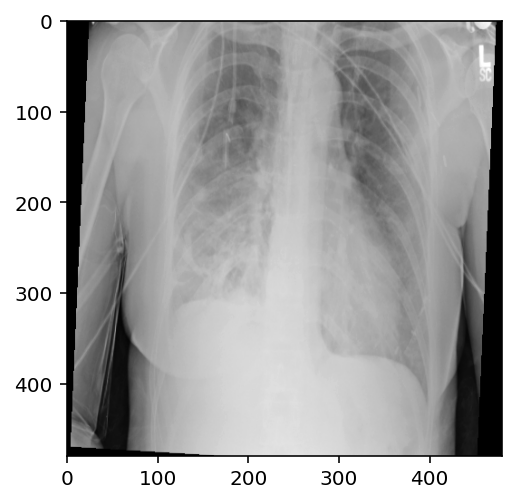

In [7]:
# Load Images Train Set
generator_train = BalanceCovidDataset(data_dir=datadir,
                                    csv_file=trainfile,
                                    batch_size=train_size,
                                    input_shape=(input_size, input_size),
                                    covid_percent=covid_percent,
                                    class_weights=[1., 1., covid_weight],
                                    top_percent=top_percent,
                                    is_training=True)

gen_X_train, gen_y_train, weights = next(generator_train)
plt.imshow(gen_X_train[10,:,:,:], cmap=plt.cm.binary)
plt.show()

1479 100


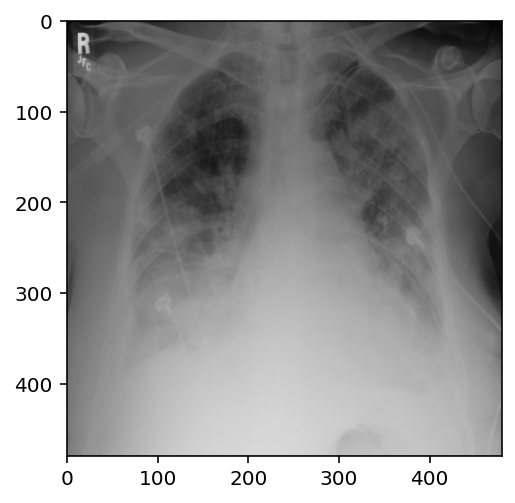

In [8]:
# Load Images Test Set
generator_test = BalanceCovidDataset(data_dir=datadir,
                                    csv_file=testfile,
                                    batch_size=test_size,
                                    input_shape=(input_size, input_size),
                                    covid_percent=covid_percent,
                                    class_weights=[1., 1., covid_weight],
                                    top_percent=top_percent,
                                    is_training=False)

X_test, y_test, weights = next(generator_test)

plt.imshow(X_test[10,:,:,:], cmap=plt.cm.binary)
plt.show()

In [9]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(gen_X_train, gen_y_train,
                                                    stratify = gen_y_train, 
                                                    test_size = 0.2)

In [10]:
# Vec2Ind
label_train = np.zeros(len(y_train[:,1]))
for i in range(0,len(y_train[:,1])):
    label_train[i] = np.argmax(y_train[i,:])
    
label_val = np.zeros(len(y_val[:,1]))
for i in range(0,len(y_val[:,1])):
    label_val[i] = np.argmax(y_val[i,:])
    
label_test = np.zeros(len(y_test[:,1]))
for i in range(0,len(y_test[:,1])):
    label_test[i] = np.argmax(y_test[i,:])

In [11]:
label_test

array([0., 2., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 2., 0., 1., 0., 2.,
       2., 0., 2., 2., 1., 0., 1., 1., 0., 0., 1., 2., 1., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 0., 1., 0., 0., 2., 0., 0., 0., 2., 0., 1., 2.,
       0., 2., 2., 1., 0., 2., 2., 0., 0., 2., 0., 1., 0., 0., 0., 2., 1.,
       1., 2., 0., 1., 2., 2., 2., 0., 2., 0., 1., 2., 0., 2., 1., 0., 0.,
       1., 2., 1., 1., 0., 1., 2., 0., 0., 1., 2., 2., 2., 0., 0.])

In [12]:
# CNN Architecture
model = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=3, activation='relu', input_shape=(480,480,3), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Conv2D(10, kernel_size=3, activation='relu', input_shape=(480,480,3), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [13]:
# Model Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Callbacks Definition
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('fashion_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [15]:
# fit

#for epoch
#for i batch
#load dataset

history = model.fit(X_train, label_train, batch_size=10, validation_data=(X_val,label_val), epochs=1,
                    verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/10
32/32 [==============================] - 2s 53ms/step - loss: 1.6573 - accuracy: 0.3531 - val_loss: 1.0969 - val_accuracy: 0.3750
Epoch 2/10
32/32 [==============================] - 1s 46ms/step - loss: 1.0454 - accuracy: 0.5125 - val_loss: 1.0419 - val_accuracy: 0.4750
Epoch 3/10
32/32 [==============================] - 1s 46ms/step - loss: 0.8992 - accuracy: 0.5906 - val_loss: 1.0406 - val_accuracy: 0.4625
Epoch 4/10
32/32 [==============================] - 1s 45ms/step - loss: 0.5493 - accuracy: 0.8062 - val_loss: 1.2460 - val_accuracy: 0.4000
Epoch 5/10
32/32 [==============================] - 1s 45ms/step - loss: 0.2827 - accuracy: 0.9312 - val_loss: 1.4693 - val_accuracy: 0.3375
Epoch 6/10
32/32 [==============================] - 1s 45ms/step - loss: 0.1487 - accuracy: 0.9719 - val_loss: 1.6382 - val_accuracy: 0.4500
Epoch 7/10
32/32 [==============================] - 1s 45ms/step - loss: 0.0597 - accuracy: 0.9937 - val_loss: 1.8260 - val_accuracy: 0.3875
Epoch 8/10
32

In [16]:
# Accuracy Evaluatio

test_loss, test_acc = model.evaluate(X_test, label_test)

4/4 [==============================] - 0s 55ms/step - loss: 1.6849 - accuracy: 0.4100


In [17]:
# Prediction Evaluatio
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)

pred = np.zeros(len(predictions[:,1]))
for i in range(0,len(predictions[:,1])):
    pred[i] = np.argmax(predictions[i,:])

print(classification_report(label_test,pred))

print(confusion_matrix(label_test,pred))

              precision    recall  f1-score   support

         0.0       0.45      0.54      0.49        46
         1.0       0.33      0.29      0.31        24
         2.0       0.39      0.30      0.34        30

    accuracy                           0.41       100
   macro avg       0.39      0.38      0.38       100
weighted avg       0.40      0.41      0.40       100

[[25  8 13]
 [16  7  1]
 [15  6  9]]
